In [1]:
# Snippet to allow centering of plot outputs in the notebook

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [13]:
import numpy as np
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

import seaborn.apionly as sns
%run './plot_setup.py'

# Representation of the celestial sphere. This script implements various 2D projections used to represent the 3D surface of a sphere

In [4]:
# Generate random points on a sphere
phi = np.random.uniform(low=0, high=2 * np.pi, size=1000)

costheta = np.random.uniform(low=-1, high=1, size=1000)
theta = np.arccos(costheta)

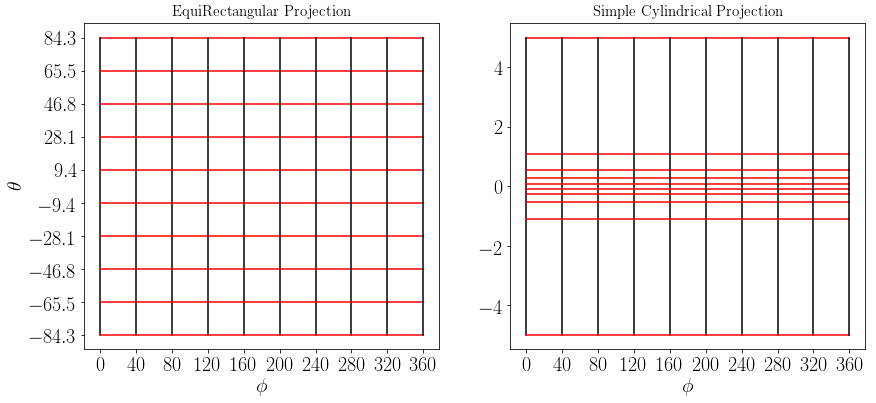

In [14]:
num_lines = 10

fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
ax[0].set_color_cycle(sns.color_palette("rainbow",num_lines))
ax[1].set_color_cycle(sns.color_palette("rainbow",num_lines))


theta_fixed = np.linspace(0 + 0.1, np.pi - 0.1, num_lines)
phi = np.linspace(0, 2*np.pi, 100)

phi_fixed = np.linspace(0, 2*np.pi, num_lines)
theta = np.linspace(0 + 0.1, np.pi - 0.1 , 100)

for k in range(num_lines):
    ax[0].plot(np.rad2deg(phi), np.rad2deg(np.pi/2. - np.ones(len(phi)) * theta_fixed[k]), color='r')
    ax[0].plot(np.rad2deg(np.ones(len(theta)) * phi_fixed[k]), np.rad2deg(np.pi/2. - theta), color='k')
    #ax[1].plot(phi, np.cos(np.ones(len(phi)) * theta_fixed[k]) * np.sin(phi))
    #ax[1].plot(np.ones(len(phi)) * phi_fixed[k], np.cos(theta) * np.sin(np.ones(len(phi)) * phi_fixed[k]))
    ax[1].plot(np.rad2deg(phi), 0.5/np.tan(np.ones(len(phi)) * theta_fixed[k]), color='r')
    ax[1].plot(np.rad2deg(np.ones(len(theta)) * phi_fixed[k]), 0.5/np.tan(theta), color='k')
    
ax[0].set_xlabel(r'$\phi$')
ax[0].set_ylabel(r'$\theta$')

ax[0].xaxis.set_major_locator(ticker.FixedLocator(phi_fixed * 180.0/np.pi))
ax[0].yaxis.set_major_locator(ticker.FixedLocator((np.pi/2. - theta_fixed) * 180.0/np.pi))

ax[1].xaxis.set_major_locator(ticker.FixedLocator(phi_fixed * 180.0/np.pi))
ax[0].set_xlabel(r'$\phi$')
ax[1].set_xlabel(r'$\phi$')
ax[0].set_ylabel(r'$\theta$')

ax[0].set_title('EquiRectangular Projection')
ax[1].set_title('Simple Cylindrical Projection')
plt.show()

# Mercator Projection
### $$x = \frac{L}{2 \pi} \phi$$
### $$y = \frac{L}{2 \pi} \log \left[\tan\left(\frac{\pi}{2} - \frac{\theta}{2}\right)\right]$$

In [6]:
# Length of Map
lMap = 10

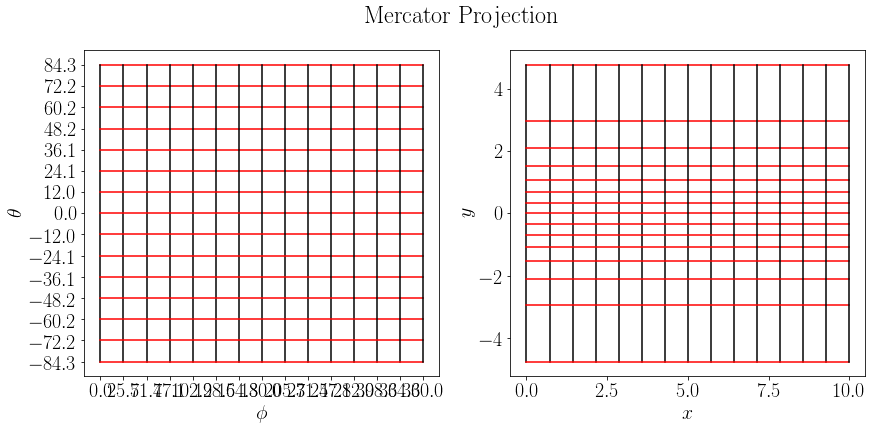

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
ax[0].set_color_cycle(sns.color_palette("rainbow",num_lines))
ax[1].set_color_cycle(sns.color_palette("rainbow",num_lines))


theta_fixed = np.linspace(0 + 0.1, np.pi - 0.1, num_lines)
phi = np.linspace(0, 2*np.pi, 100)

phi_fixed = np.linspace(0, 2*np.pi, num_lines)
theta = np.linspace(0 + 0.1, np.pi - 0.1 , 100)

for k in range(num_lines):
    ax[0].plot(np.rad2deg(phi), np.rad2deg(np.pi/2. - np.ones(len(phi)) * theta_fixed[k]), color='r')
    ax[0].plot(np.rad2deg(np.ones(len(theta)) * phi_fixed[k]), np.rad2deg(np.pi/2. - theta), color='k')

    ax[1].plot(lMap * phi / (2 * np.pi) , lMap/(2*np.pi) *  np.log(np.tan(np.pi/2 - np.ones(len(phi)) * theta_fixed[k]/2.)), color='r')
    ax[1].plot(lMap * (np.ones(len(theta)) * phi_fixed[k]) / (2*np.pi), lMap/(2*np.pi) * np.log(np.tan(np.pi/2 - theta/2)), color='k')
    
ax[0].set_xlabel(r'$\phi$')
ax[0].set_ylabel(r'$\theta$')

ax[0].xaxis.set_major_locator(ticker.FixedLocator(phi_fixed * 180.0/np.pi))
ax[0].yaxis.set_major_locator(ticker.FixedLocator((np.pi/2. - theta_fixed) * 180.0/np.pi))

ax[0].set_xlabel(r'$\phi$')
ax[0].set_ylabel(r'$\theta$')

ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')


plt.suptitle('Mercator Projection')
plt.show()

# Lambert azimuthal equal-area projection
### $$(X, Y) = \left(\sqrt{\frac{2}{1-z}} x, \sqrt{\frac{2}{1-z}} y \right)$$
## $$(r, \lambda) = \left( 2 \cos(\theta/2), \phi \right) $$

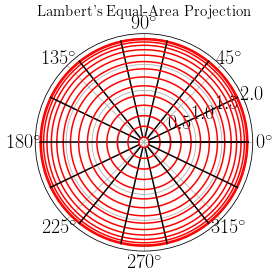

In [18]:
ax = plt.subplot(111, projection='polar')
ax.set_color_cycle(sns.color_palette("rainbow",num_lines))

theta_fixed = np.linspace(0 + 0.1, np.pi - 0.1, num_lines)
phi = np.linspace(0, 2*np.pi, 100)

phi_fixed = np.linspace(0, 2*np.pi, num_lines)
theta = np.linspace(0 + 0.1, np.pi - 0.1 , 100)

for k in range(num_lines):
    r1 = 2 * np.cos(np.ones(len(phi)) * theta_fixed[k]/2.) 
    lam1 = phi
    r2 = 2 * np.cos(theta/2.) 
    lam2 = np.ones(len(theta)) * phi_fixed[k]
    
    ax.plot(lam1, r1, color='r')
    ax.plot(lam2, r2, color='k')
    
plt.title('Lambert\'s Equal-Area Projection')
plt.show()

# Rotation using Rodrigues' formula
## $$\mathbf{b} = \cos \beta\ \mathbf{a}  + \sin \beta (\hat{k} \times \mathbf{a}) + (\hat{k} \cdot \mathbf{a})(1 - \cos \beta) \hat{k} $$

In [9]:
# Implementation of the above formula making use of NumPy's vectorization
def rotateSphere(set1, set2, beta):
    set1 = np.atleast_2d(set1).T
    
    x = np.sin(set1[0]) * np.cos(set1[1])
    y = np.sin(set1[0]) * np.sin(set1[1])
    z = np.cos(set1[0])
    a = np.vstack((x, y, z)).T
    
    k = np.array([np.sin(set2[0]) * np.cos(set2[1]), np.sin(set2[0]) * np.sin(set2[1]), np.cos(set2[0])])
    b = np.cos(beta) * a + np.sin(beta) * np.cross(k, a) + k * (1 - np.cos(beta)) * np.dot(k, a.T)[:,None]

    phi = np.arctan2(b[:,1], b[:,0])
    theta = np.arctan2(np.sqrt(b[:,0] ** 2 + b[:,1] ** 2), b[:,2])
    
    return np.vstack((theta, phi)).T

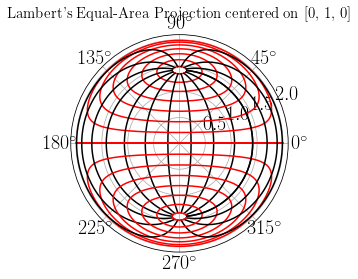

In [19]:
num_lines = 15

ax = plt.subplot(111, projection='polar')
ax.set_color_cycle(sns.color_palette("rainbow",num_lines))

theta_fixed = np.linspace(0 + 0.1, np.pi - 0.1, num_lines)
phi = np.linspace(0, 2*np.pi, 1000)

phi_fixed = np.linspace(0, 2*np.pi, num_lines)
theta = np.linspace(0 + 0.1, np.pi - 0.1 , 1000)

for k in range(num_lines):
    set1 = np.vstack((np.ones(len(phi)) * theta_fixed[k], phi)).T
    set2 = np.vstack((theta, np.ones(len(theta)) * phi_fixed[k])).T
    
    res1 = rotateSphere(set1, np.array([np.pi/2., 0]), -np.pi/2.)
    res2 = rotateSphere(set2, np.array([np.pi/2., 0]), -np.pi/2.)
    
    r1 = 2 * np.cos(res1[:,0]/2.) 
    lam1 = res1[:,1]
    
    r2 = 2 * np.cos(res2[:,0]/2.) 
    lam2 = res2[:,1]
    
    ax.plot(lam1, r1, color='r')
    ax.plot(lam2, r2, color='k')
    
plt.title('Lambert\'s Equal-Area Projection centered on [0, 1, 0]')
plt.show()

# Mollweide Projection
### $$x = \frac{2}{\pi} (\phi - \pi) \cos \eta, \quad y = \sin \eta$$
### $$ 2 \eta + \sin (2 \eta) = - \pi \cos \theta$$

In [11]:
from scipy.optimize import fsolve
def myfunc(x, theta):
    return 2*x + np.sin(2*x) - np.pi * np.sin(theta)

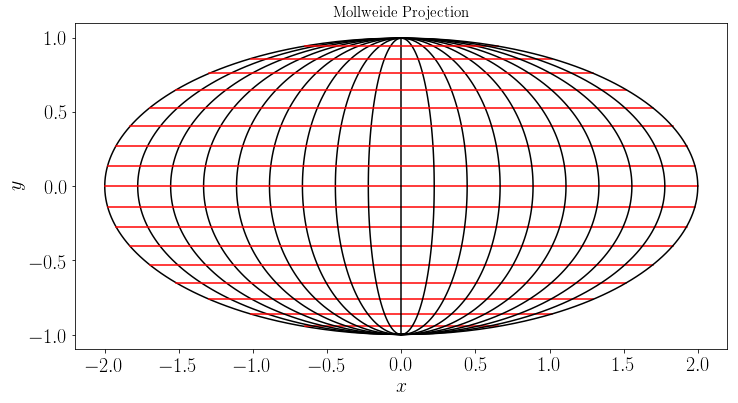

In [20]:
num_lines = 19

fig, ax = plt.subplots(1, figsize=(14, 6))

theta_fixed = np.linspace(-np.pi/2. , np.pi/2. , num_lines)
phi = np.linspace(0, 2*np.pi, 100)

phi_fixed = np.linspace(0, 2*np.pi, num_lines)
theta = np.linspace(-np.pi/2., np.pi/2. , 100)

for k in range(num_lines):
    eta = fsolve(myfunc, theta_fixed[k], args=(theta_fixed[k]))
    ax.plot(2 * (phi - np.pi) * np.cos(eta) / np.pi, np.sin(np.ones(len(phi)) * eta), color='r')
    
    res = np.array([fsolve(myfunc, ele, args=(ele)) for ele in theta])
    ax.plot(2 * np.cos(res) * (phi_fixed[k] - np.pi) / np.pi, np.sin(res), color='k')
    
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.title('Mollweide Projection')
plt.show()